In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'utkface-new:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F44109%2F78156%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T092708Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D11cd187e7389ea6a6d845a77a2fc4d4b65197260aad96772e93941abfe1900067197c6d68b133fd401405f88d77527be23eb56202ae0da59b98be6fd562af772b0e135a9a7f211a7139e72397ecfb613ec5e520d7465187c88efbc0a6dc7e20703a5ff62e59ae4a51ef3ec701bab83b989469f01468cc714eda6d62173e51cbefd5fc1d002cecc67ffe1d7044fa30abb461ebc472edbaa483fd04f8c0a102256c1ef29f99fcdc005796dd5dd7f93048ed9f89aa9266cf703949c96a56a5fddcb40a3b57018f01cc20e406eacdc9a3103630a325ccb9004a1f5a43c900b95ad2369986121c9421224f6c88e52011082e596af8503f6137e682ecc195a6da01795'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 347342542 bytes downloaded
Downloaded and uncompressed: utkface-new
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/25_1_3_20170104232710103.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/28_0_1_20170113195927894.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/24_1_1_20170115234919997.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/16_1_4_20170103201023166.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/24_0_1_20170114030404017.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/34_0_3_20170119200611509.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/29_0_3_20170119165447462.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/54_0_0_20170111222617768.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/16_0_0_20170110232451479.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/34_1_0_20170104174537956.jp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [4]:
fldr="/kaggle/input/utkface-new/UTKFace"

In [5]:
import os
files = os.listdir(fldr)

In [6]:
ages=[]
genders=[]
images=[]
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image=cv2.resize(image, (48,48))
    images.append(image)

Streaming output truncated to the last 5000 lines.
/kaggle/input/utkface-new/UTKFace/38_0_0_20170117184616952.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_0_4_20170117163456359.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/54_0_3_20170117171122244.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/31_0_3_20170104220255896.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/20_1_4_20170103224557431.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_1_20170117182333220.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/55_1_0_20170117152514923.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/31_1_2_20170116191331056.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_1_0_20170117180707457.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170119153944161.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/1_1_4_20161221192837420.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170109212956509.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/1_0_4_20161221202132305.jpg.chip.jpg
/kaggle/input/u

In [7]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

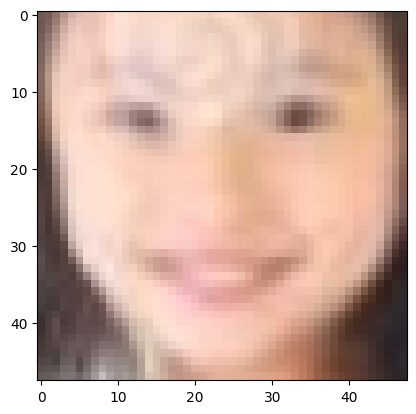

In [8]:
from matplotlib import pyplot as plt
plt.imshow(images[61])

In [9]:
import numpy as np
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

np.save('/kaggle/working/image.npy',images_f)
np.save('/kaggle/working/ages.npy',ages_f)
np.save('/kaggle/working/genders.npy',genders_f)

In [10]:
values, counts =np. unique (genders_f, return_counts=True)
print(counts)

[12391 11317]


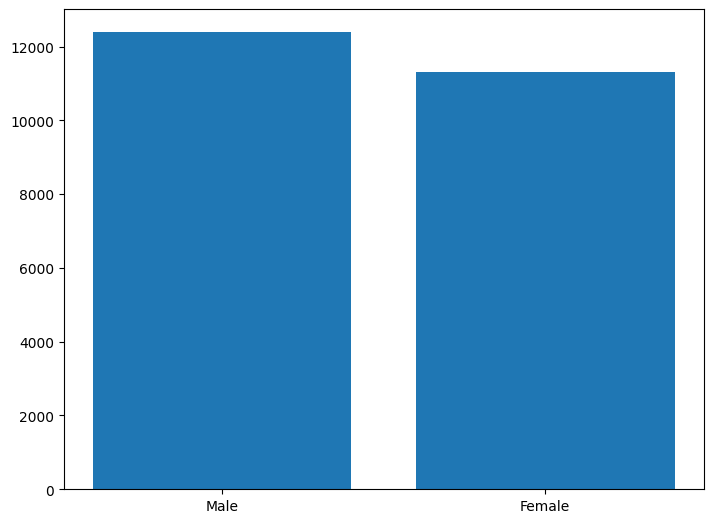

In [11]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male', 'Female']
values=[12391,11317]
ax.bar(gender, values)
plt.show()

In [12]:
values, counts=np. unique (ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [13]:
val=values.tolist()
cnt=counts.tolist()

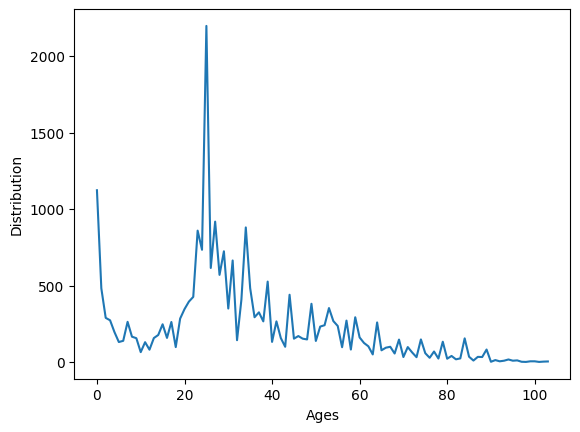

In [14]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [15]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [16]:
images_f_2=images_f/255

In [17]:
images_f_2.shape

(23708, 48, 48, 3)

In [18]:
labels_f=np.array(labels)

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

Y_train[0:5]

array([[26,  0],
       [32,  0],
       [34,  1],
       [ 7,  0],
       [52,  0]])

In [20]:
Y_train[0:5]

array([[26,  0],
       [32,  0],
       [34,  1],
       [ 7,  0],
       [52,  0]])

In [21]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [22]:
Y_train_2[0][0:5]

array([0, 0, 1, 0, 0])

In [23]:
Y_train_2[1][0:5]

array([26, 32, 34,  7, 52])

In [24]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [25]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten= Flatten()(maxp_5)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["mse","mae"],optimizer="rmsprop",metrics=["accuracy"])
    return model

In [26]:
Model=model((48,48,3))

Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint (fle_s, monitor= 'val_loss', verbose=1, save_best_only=True, save_weights_only=False,mode= 'auto', save_freq='epoch')
Early_stop=tf.keras.callbacks. EarlyStopping (patience=25, monitor= 'val_loss', restore_best_weights='True')
callback_list=[checkpoint, Early_stop]

In [45]:
History=Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=50, callbacks=callback_list)

Epoch 1/50
275/278 [============================>.] - ETA: 0s - loss: 6.0808 - sex_out_loss: 0.0963 - age_out_loss: 5.2528 - sex_out_accuracy: 0.8624 - age_out_accuracy: 0.0440
Epoch 1: val_loss did not improve from 7.03145
278/278 [==============================] - 6s 22ms/step - loss: 6.0770 - sex_out_loss: 0.0961 - age_out_loss: 5.2492 - sex_out_accuracy: 0.8626 - age_out_accuracy: 0.0443 - val_loss: 7.7738 - val_sex_out_loss: 0.0941 - val_age_out_loss: 6.9450 - val_sex_out_accuracy: 0.8677 - val_age_out_accuracy: 0.0472
Epoch 2/50
278/278 [==============================] - ETA: 0s - loss: 6.0731 - sex_out_loss: 0.0946 - age_out_loss: 5.2428 - sex_out_accuracy: 0.8625 - age_out_accuracy: 0.0443
Epoch 2: val_loss did not improve from 7.03145
278/278 [==============================] - 5s 17ms/step - loss: 6.0731 - sex_out_loss: 0.0946 - age_out_loss: 5.2428 - sex_out_accuracy: 0.8625 - age_out_accuracy: 0.0443 - val_loss: 7.3451 - val_sex_out_loss: 0.0904 - val_age_out_loss: 6.5171 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


276/278 [============================>.] - ETA: 0s - loss: 6.0386 - sex_out_loss: 0.0946 - age_out_loss: 5.1918 - sex_out_accuracy: 0.8638 - age_out_accuracy: 0.0448
Epoch 6: val_loss did not improve from 6.97566
278/278 [==============================] - 5s 18ms/step - loss: 6.0389 - sex_out_loss: 0.0947 - age_out_loss: 5.1920 - sex_out_accuracy: 0.8636 - age_out_accuracy: 0.0449 - val_loss: 8.0592 - val_sex_out_loss: 0.0912 - val_age_out_loss: 7.2133 - val_sex_out_accuracy: 0.8687 - val_age_out_accuracy: 0.0472
Epoch 7/50
277/278 [============================>.] - ETA: 0s - loss: 6.0184 - sex_out_loss: 0.0944 - age_out_loss: 5.1699 - sex_out_accuracy: 0.8656 - age_out_accuracy: 0.0442
Epoch 7: val_loss did not improve from 6.97566
278/278 [==============================] - 7s 25ms/step - loss: 6.0207 - sex_out_loss: 0.0943 - age_out_loss: 5.1722 - sex_out_accuracy: 0.8657 - age_out_accuracy: 0.0442 - val_loss: 8.3321 - val_sex_out_loss: 0.0962 - val_age_out_loss: 7.4818 - val_sex_out

In [46]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 1s 5ms/step - loss: 6.9757 - sex_out_loss: 0.0933 - age_out_loss: 6.1327 - sex_out_accuracy: 0.8638 - age_out_accuracy: 0.0461


[6.975661754608154,
 0.0933009535074234,
 6.132734298706055,
 0.8638434410095215,
 0.04606040194630623]

In [47]:
pred = Model.predict(X_test)

186/186 [==============================] - 1s 3ms/step


In [48]:
pred[1]

array([[44.294556 ],
       [ 0.7643721],
       [55.527992 ],
       ...,
       [22.258173 ],
       [26.433792 ],
       [73.915535 ]], dtype=float32)

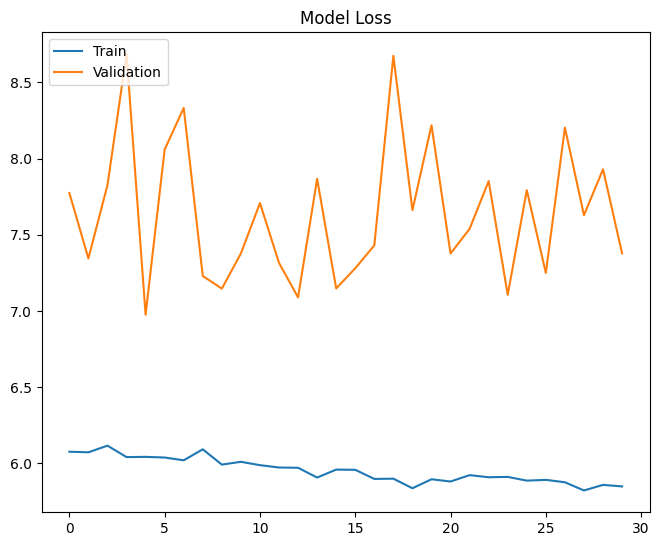

In [49]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend (['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0, hspace=0.25,wspace=0.35)

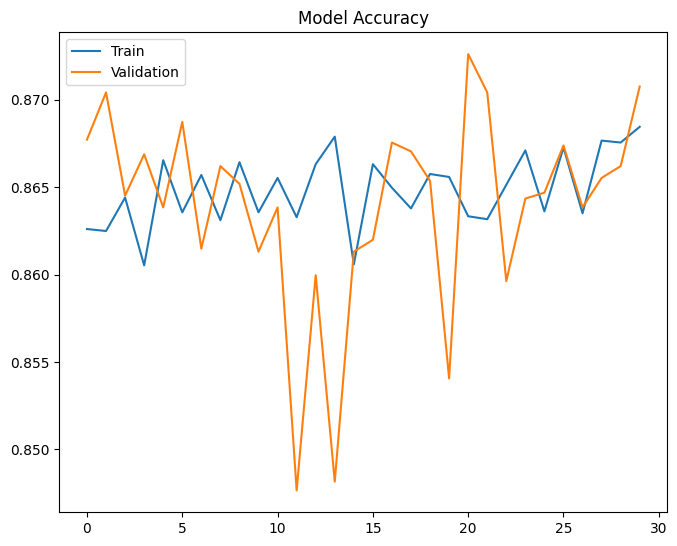

In [50]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend (['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0, hspace=0.25, wspace=0.35)

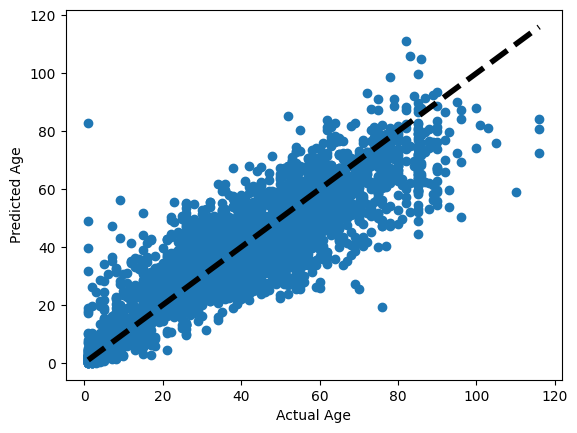

In [51]:
fig, ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(),Y_test_2[1].max()], 'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [52]:
i=0
Pred_1=[]
while(i<len(pred[0])):
    Pred_1.append(int (np.round(pred[0][1])))
    i=i+1


<ipython-input-52-f98e224dcb79>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_1.append(int (np.round(pred[0][1])))


In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
report=classification_report (Y_test_2[0],Pred_1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
report=classification_report (Y_test_2[0],Pred_1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
results=confusion_matrix(Y_test_2[0], Pred_1)

<Axes: >

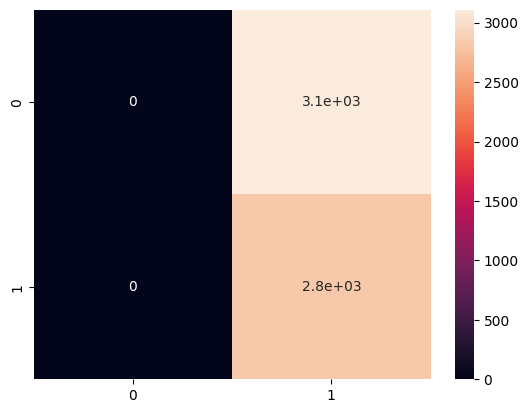

In [58]:
import seaborn as sns
sns.heatmap(results, annot=True)

In [61]:
def test_image(ind, images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=model.predict(np.array([image_test]))
    sex_f=['Male', 'Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

AttributeError: 'function' object has no attribute 'predict'

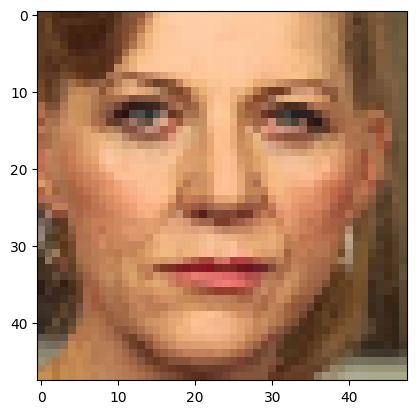

In [62]:
test_image(4,images_f,images_f_2, model)